<center> <h1>Método de Bisección</h1> </center>

El algoritmo de búsqueda de raíces más sencillo es el método de bisección, el cual aplica el [teorema del valor intermedio (TVI)](https://es.wikipedia.org/wiki/Teorema_del_valor_intermedio). Dicho teorema  establece que toda función continua $f$ en un intervalo cerrado $[a,b]$ toma todos los valores que se hallan entre $f(a)$ y $f(b)$. En caso de que $f(a)$ y $f(b)$ tengan signos opuestos, el valor cero sería un valor intermedio entre $f(a)$ y $f(b)$, por lo que con certeza existe un punto en el intervalo $[a,b]$ donde se anula la función.

Sea $f$ una función continua sobre un intervalo $[a, b]$ tal que $f(a).f(b)<0$, o sea que $f(a)$ y $f(b)$ tienen signos opuestos. Sea $c = (a+b)/2$, el punto medio del intervalo. Si $f(c)=0$, entonces $c$ puede tomarse como la solución y el proceso se detiene.

Si $f(c) \neq 0$, entonces se cumple que, dados los sub-intervalos $[a,c]$ y $[c,b]$, la función debe cambiar de signo en alguno de ellos, es decir que $f(a).f(c)<0$ o $f(c).f(b)<0$, por lo que, o bien $f(a), f(c)$ tienen signos opuestos o bien $f(c), f(b)$ tienen signos opuestos. De esta manera, eligiendo el sub-intervalo adecuado, hemos dividido por dos el tamaño del intervalo original. Repitiendo este proceso sucesivamente se va estrechando el intervalo cada vez más, lo que aumenta la precisión de la raíz aproximada. 

Aunque el método de bisección es robusto, hay otros métodos que, bajo condiciones apropiadas, pueden ganar precisión más rápidamente.

**Algoritmo**

entrada: 

    función f, 
    
    extremos del intervalo a, b, 
    
    tolerancia TOL, 
    
    número máximo de iteraciones NMAX
    
condiciones: 

    a < b, (f(a) < 0 y f(b) > 0) o (f(a) > 0 y f(b) < 0)
             
salida: 

    un valor x tal que |f(x)| < TOL

N ← 1

while N ≤ NMAX do // límite de las iteraciones para evitar bucles infinitos

    c ← (a + b)/2 // nuevo punto medio
    
    if f(c) = 0 or (b – a)/2 < TOL then // solución encontrada
    
        Output(c)
        
        Stop
        
    end if
    
    N ← N + 1 // incrementar el contador de iteraciones
    
    if sign(f(c)) = sign(f(a)) then a ← c else b ← c // nuevo intervalo
    
end while

Output("Method failed.") // se excedió el número máximo de iteraciones 

Ejemplo Suponga que se usa el método de bisección para encontrar una raíz del polinomio $f(x)=x^{3}-x-2$. Primero, debemos encontrar dos números a y b tales que la función tenga signos opuestos en dichos puntos, es decir que $f(a).f(b)<0$. Si tomamos $a=1$ y $b=2$ se tiene que:

$$f(1)=(1)^{3}-(1)-2=-2$$

y 

$$f(2)=(2)^{3}-(2)-2=+4$$.

Como es una función continua, debe existir al menos una raíz en el intervalo $[1, 2]$. A continuación se muestra una tabla con los resultados obtenidos durante 15 iteraciones del método.

Iteración	| $a_{n}$ | $b_{n}$ | $c_{n}$ | $f(c_{n})$ 
--------------|-------|---------|---------|----------
1	| 1	        | 2	       | 1.5	   | −0.125
2	| 1.5	    |2	       |1.75	   |1.6093750
3	|1.5	    |1.75	   |1.625	    |0.6660156
4	|1.5	    |1.625	   |1.5625	    |0.2521973
5	|1.5	    |1.5625	   |1.5312500	|0.0591125
6	|1.5	    |1.5312500 |1.5156250	|−0.0340538
7	|1.5156250	|1.5312500	|1.5234375	|0.0122504
8	|1.5156250	|1.5234375	|1.5195313	|−0.0109712
9	|1.5195313	|1.5234375	|1.5214844	|0.0006222
10	|1.5195313	|1.5214844	|1.5205078	|−0.0051789
11	|1.5205078	|1.5214844	|1.5209961	|−0.0022794
12	|1.5209961	|1.5214844	|1.5212402	|−0.0008289
13	|1.5212402	|1.5214844	|1.5213623	|−0.0001034
14	|1.5213623	|1.5214844	|1.5214233	|0.0002594
15	|1.5213623	|1.5214233	|1.5213928	|0.0000780


Después de 13 iteraciones, se observa que el método converge a un valor alrededor de 1.5213623, el cual se puede considerar una raíz del polinomio.

In [1]:
x = 1.5213623
x**3 - x - 2

-0.00010346098427738148

El número de iteraciones $n$ necesario para alcanzar una tolerancia $\epsilon$ (es decir, garantizar que el error sea menor que $\epsilon$) viene dado por 

$${\displaystyle n\leq \left\lceil \log _{2}\left({\frac {\epsilon _{0}}{\epsilon }}\right)\right\rceil ,}$$

donde ${\displaystyle \epsilon _{0}=|b-a|}$ y ${\displaystyle \epsilon \leq \epsilon _{0}.}$

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

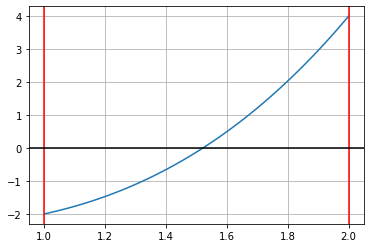

In [6]:
def f(x):
    return x**3 - x - 2

def graf0(x_low, x_high):
    x = np.linspace(x_low, x_high, num = 100)
    f_x = [f(x[i]) for i in range(len(x))]

    plt.plot(x, f_x)
    plt.grid()
    plt.axvline(x_low, color = 'r')
    plt.axvline(x_high, color = 'r')
    plt.axhline(color = 'k')
    
graf0(1,2)
plt.show()

punto medio 1.5
punto medio 1.75
punto medio 1.625
punto medio 1.5625
punto medio 1.53125
punto medio 1.515625
punto medio 1.5234375
punto medio 1.51953125
punto medio 1.521484375
punto medio 1.5205078125
punto medio 1.52099609375
punto medio 1.521240234375
punto medio 1.5213623046875
punto medio 1.52142333984375
punto medio 1.521392822265625
punto medio 1.5213775634765625
punto medio 1.5213851928710938
punto medio 1.5213813781738281
punto medio 1.5213794708251953
punto medio 1.5213804244995117
punto medio 1.5213799476623535
punto medio 1.5213797092437744
abs(f(m)) < tol 1.5213797092437744


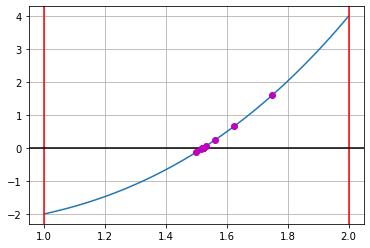

In [10]:
def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    print('punto medio', m)
    plt.plot(m, f(m), 'mo')
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        print('abs(f(m)) < tol', m)
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

graf0(1,2)
my_bisection(f,1,2,0.000001)
plt.show()

<center> <h3>Bibliografía</h3> </center>

* [Método de bisección](https://es.wikipedia.org/wiki/M%C3%A9todo_de_bisecci%C3%B3n)

* [Bisection method](https://en.wikipedia.org/wiki/Bisection_method)

* [Bisection Method U.Berkeley](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.03-Bisection-Method.html)